In [2]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

In [3]:
# load datas
mnist = tf.keras.datasets.fashion_mnist
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

In [4]:
# Data normolization
train_images = train_images / 255.0
test_images = test_images / 255.0
print(type(train_labels))
print(type(test_labels))
print(train_labels.shape)
print(test_labels.shape)

<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
(60000,)
(10000,)


In [5]:
# Sequential model
model = tf.keras.models.Sequential([
    tf.keras.layers.Flatten(input_shape = (28,28)),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dense(10,activation='softmax')
])

In [6]:
# complie medel
loss = tf.keras.losses.sparse_categorical_crossentropy
metrics = tf.keras.metrics.sparse_categorical_accuracy

model.compile(optimizer='adam', loss=loss, metrics=[metrics])

In [7]:
# define argument
train_epochs = 10
batch_size = 32

In [8]:
# train model
train_history = model.fit(train_images, 
        train_labels, 
        validation_split=0.2,
        epochs = train_epochs, 
        batch_size=batch_size, 
        verbose = 2)

Train on 48000 samples, validate on 12000 samples
Epoch 1/10
48000/48000 - 182s - loss: 0.5152 - sparse_categorical_accuracy: 0.8198 - val_loss: 0.4111 - val_sparse_categorical_accuracy: 0.8563
Epoch 2/10
48000/48000 - 6s - loss: 0.3799 - sparse_categorical_accuracy: 0.8613 - val_loss: 0.3865 - val_sparse_categorical_accuracy: 0.8626
Epoch 3/10
48000/48000 - 6s - loss: 0.3421 - sparse_categorical_accuracy: 0.8736 - val_loss: 0.3527 - val_sparse_categorical_accuracy: 0.8684
Epoch 4/10
48000/48000 - 6s - loss: 0.3146 - sparse_categorical_accuracy: 0.8837 - val_loss: 0.3335 - val_sparse_categorical_accuracy: 0.8773
Epoch 5/10
48000/48000 - 5s - loss: 0.2979 - sparse_categorical_accuracy: 0.8889 - val_loss: 0.3414 - val_sparse_categorical_accuracy: 0.8778
Epoch 6/10
48000/48000 - 5s - loss: 0.2831 - sparse_categorical_accuracy: 0.8945 - val_loss: 0.3523 - val_sparse_categorical_accuracy: 0.8746
Epoch 7/10
48000/48000 - 5s - loss: 0.2691 - sparse_categorical_accuracy: 0.8998 - val_loss: 0.3

In [9]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten (Flatten)            (None, 784)               0         
_________________________________________________________________
dense (Dense)                (None, 128)               100480    
_________________________________________________________________
dense_1 (Dense)              (None, 64)                8256      
_________________________________________________________________
dense_2 (Dense)              (None, 10)                650       
Total params: 109,386
Trainable params: 109,386
Non-trainable params: 0
_________________________________________________________________


In [10]:
# show the training arguement
train_history.history

{'loss': [0.5151534342368443,
  0.3799094401896,
  0.342088971833388,
  0.3145507379596432,
  0.2978512515227,
  0.28313466150686145,
  0.26911599571133654,
  0.25768361218149466,
  0.24853903537243605,
  0.23877066223944227],
 'sparse_categorical_accuracy': [0.8197708,
  0.86127084,
  0.8736042,
  0.8836875,
  0.888875,
  0.8945,
  0.89977086,
  0.9029792,
  0.9068958,
  0.9096042],
 'val_loss': [0.41113411062955857,
  0.3865105551282565,
  0.35265685961643856,
  0.33353127841154734,
  0.34137291797002156,
  0.35228730421264964,
  0.3379994744261106,
  0.33022125335534414,
  0.33348171210289,
  0.32493021168311437],
 'val_sparse_categorical_accuracy': [0.8563333,
  0.86258334,
  0.86841667,
  0.87725,
  0.8778333,
  0.8745833,
  0.88025,
  0.88133335,
  0.88025,
  0.88916665]}

In [11]:
# make the training processing visualized
def show_train_history(train_history, train_metric, val_metric):
    
    plt.plot(train_history.history[train_metric])
    plt.plot(train_history.history[val_metric])
    
    plt.title("Train History")
    
    plt.ylabel(train_metric)
    plt.xlabel('Epoch')
    
    plt.legend(['train','validation'], loc='upper left')
    
    plt.show

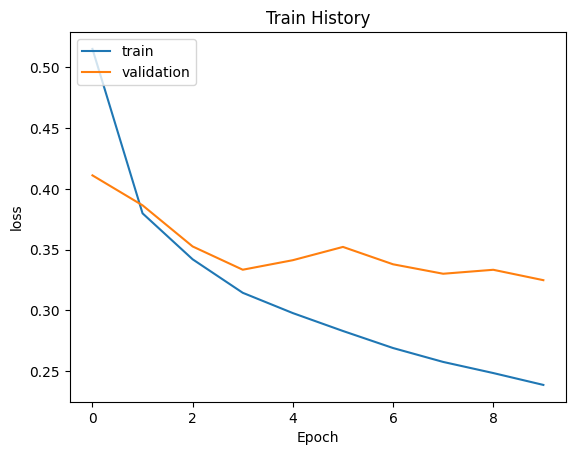

In [12]:
# display the results
show_train_history(train_history, 'loss', 'val_loss')

In [13]:
# evaluate the model
test_loss, test_acc = model.evaluate(test_images, test_labels,verbose=2)
print(test_loss)
print(test_acc)

10000/10000 - 1s - loss: 0.3589 - sparse_categorical_accuracy: 0.8800
0.3589447003185749
0.88


In [14]:
model.metrics_names

['loss', 'sparse_categorical_accuracy']

In [15]:
# show the predictions
# test_pred = tf.convert_to_tensor(model.predict(test_images))
test_pred = model.predict(test_images)
print(test_pred)

[[1.3539581e-08 3.7925606e-06 2.3894622e-06 ... 5.0790798e-02
  1.3840513e-07 9.4872290e-01]
 [1.0727446e-05 1.4180563e-13 9.9908221e-01 ... 4.2929705e-15
  4.0884574e-12 1.6724834e-12]
 [6.7636527e-09 1.0000000e+00 5.1554809e-15 ... 3.0706693e-21
  1.0917896e-15 1.9100055e-15]
 ...
 [2.1057883e-06 8.3935393e-12 1.6215961e-06 ... 1.3594125e-08
  9.9999452e-01 1.0770234e-09]
 [1.4466939e-07 9.9995780e-01 2.1228030e-10 ... 2.4427858e-14
  1.3266793e-10 4.6973453e-10]
 [2.1137354e-05 3.2440679e-05 1.3226818e-03 ... 7.5122891e-03
  1.5643216e-03 9.6685253e-05]]


In [16]:
print(test_pred.shape)


(10000, 10)


In [17]:
np.argmax(test_pred[0])

9

In [18]:
test_pred = model.predict_classes(test_images)
print(test_pred)

[9 2 1 ... 8 1 5]
